In [1]:
import sqlite3 as sql
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import pyarrow as pa
import pyarrow.parquet as pq

In [2]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [80]:
root_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied"

root_dir_10 = root_dir + "/Snowstorm/22010/"
root_dir_11 = root_dir + "/Snowstorm/22011/"
root_dir_12 = root_dir + "/Snowstorm/22012/"
root_dir_13 = root_dir + "/Snowstorm/22013/"
root_dir_14 = root_dir + "/Snowstorm/22014/"
root_dir_15 = root_dir + "/Snowstorm/22015/"
root_dir_16 = root_dir + "/Snowstorm/22016/"
root_dir_17 = root_dir + "/Snowstorm/22017/"
root_dir_18 = root_dir + "/Snowstorm/22018/"

root_collection = [root_dir_10, root_dir_11, root_dir_12, root_dir_13, root_dir_14, root_dir_15, root_dir_16, root_dir_17, root_dir_18]

pmt_dir_10_1 = root_dir_10 + "1/"
pmt_dir_11_1 = root_dir_11 + "1/"
pmt_dir_12_1 = root_dir_12 + "1/"
pmt_dir_12_10 = root_dir_12 + "10/"

pmt_dir_12_21 = root_dir_12 + "21/"

pmt_dir_13_1 = root_dir_13 + "1/"
pmt_dir_15_1 = root_dir_15 + "1/"
pmt_dir_16_1 = root_dir_16 + "1/"
pmt_dir_18_1 = root_dir_18 + "1/"

truth_10_1 = root_dir_10 + "truth_1.parquet"
truth_11_1 = root_dir_11 + "truth_1.parquet"
truth_12_1 = root_dir_12 + "truth_1.parquet"
truth_12_10 = root_dir_12 + "truth_10.parquet"
truth_13_1 = root_dir_13 + "truth_1.parquet"
truth_15_1 = root_dir_15 + "truth_1.parquet"
truth_16_1 = root_dir_16 + "truth_1.parquet"
truth_18_1 = root_dir_18 + "truth_1.parquet"

In [4]:
# how many pmtfied files in the directory
print(f"Number of pmtfied files : {len(os.listdir(pmt_dir_12_1))}")

Number of pmtfied files : 15


In [5]:
def convertParquetToDF(file:str) -> pd.DataFrame:
    table = pq.read_table(file)
    df = table.to_pandas()
    return df

In [6]:
def isClean(df:pd.DataFrame) -> bool:
    return not df.isna().any().any()

In [7]:
def checkParquetFilesForNaNs(directory: str):
    unclean_files = []
    
    for file in os.listdir(directory):
        if file.endswith('.parquet'):
            df = convertParquetToDF(os.path.join(directory, file))
            if not isClean(df):
                unclean_files.append(file)
    
    if unclean_files:
        print(f"{directory}: dirty")
        for unclean_file in unclean_files:
            print(f" - {unclean_file}")
    else:
        print(f"{directory}: clean")

In [8]:
def checkSubdirectoriesForNaNs(directory: str):
    for root, dirs, files in os.walk(directory):
        parquet_files = [file for file in files if file.endswith('.parquet')]
        if parquet_files:
            print(f"Checking directory: {root}")
            checkParquetFilesForNaNs(root)

In [9]:
checkSubdirectoriesForNaNs(root_dir_12)

Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/


/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/: clean
Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/23
/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/23: clean
Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/4
/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/4: clean
Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/11
/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/11: clean
Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/16
/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/16: clean
Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/3
/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/3: clean
Checking directory: /lustre/hpc/project/icecube/HE

In [10]:
# checkSubdirectoriesForNaNs(root_dir_10)
# checkSubdirectoriesForNaNs(root_dir_11)
# # checkSubdirectoriesForNaNs(root_dir_13)
# checkSubdirectoriesForNaNs(root_dir_15)
# checkSubdirectoriesForNaNs(root_dir_16)
# checkSubdirectoriesForNaNs(root_dir_18)

In [11]:
checkSubdirectoriesForNaNs(pmt_dir_10_1)
checkSubdirectoriesForNaNs(pmt_dir_11_1)
checkSubdirectoriesForNaNs(pmt_dir_12_1)
checkSubdirectoriesForNaNs(pmt_dir_12_10)
checkSubdirectoriesForNaNs(pmt_dir_12_21)
checkSubdirectoriesForNaNs(pmt_dir_13_1)
checkSubdirectoriesForNaNs(pmt_dir_15_1)
checkSubdirectoriesForNaNs(pmt_dir_16_1)
checkSubdirectoriesForNaNs(pmt_dir_18_1)



Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22010/1/
/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22010/1/: clean
Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22011/1/
/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22011/1/: clean
Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/1/
/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/1/: clean
Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/10/
/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/10/: clean
Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/21/
/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/21/: clean
Checking directory: /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22013/1/


KeyboardInterrupt: 

`nohup python3.9 PMTfier.py 99999 10 > log/PMTfyDebug/log_PMTfication_99999_$(date +"%d%m%Y_%H%M%S").out 2>&1 &`

In [12]:
truth_12_1

'/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/truth_1.parquet'

In [13]:
truth_10_1_df = convertParquetToDF(truth_10_1) # 100GeV-10TeV, nu_mu
truth_11_1_df = convertParquetToDF(truth_11_1) # 10TeV-1PeV, nu_mu
truth_12_1_df = convertParquetToDF(truth_12_1) # 1PeV-100PeV, nu_mu
truth_13_1_df = convertParquetToDF(truth_13_1) # 100GeV-10TeV, nu_e
truth_15_1_df = convertParquetToDF(truth_15_1) # 1PeV-100PeV, nu_e
truth_16_1_df = convertParquetToDF(truth_16_1) # 100GeV-10TeV, nu_tau
truth_18_1_df = convertParquetToDF(truth_18_1) # 1PeV-100PeV, nu_tau
truth_12_10_df = convertParquetToDF(truth_12_10) # 10TeV-1PeV, nu_mu

In [14]:
print(f"truth_10_1_df is clean: {isClean(truth_10_1_df)}")
print(f"truth_11_1_df is clean: {isClean(truth_11_1_df)}")
print(f"truth_12_1_df is clean: {isClean(truth_12_1_df)}")
print(f"truth_13_1_df is clean: {isClean(truth_13_1_df)}")
print(f"truth_16_1_df is clean: {isClean(truth_16_1_df)}")
print(f"truth_18_1_df is clean: {isClean(truth_18_1_df)}")


truth_10_1_df is clean: True
truth_11_1_df is clean: True
truth_12_1_df is clean: True
truth_13_1_df is clean: True
truth_16_1_df is clean: True
truth_18_1_df is clean: True


In [15]:
truth_12_10_df

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid,CascadeFilter_13,MuonFilter_13,zenith_GNHighestEDaughter,azimuth_GNHighestEDaughter,energy_GNHighestEDaughter,pos_x_GNHighestEDaughter,pos_y_GNHighestEDaughter,pos_z_GNHighestEDaughter
0,112001000262585,262585,12,10,1,11,11,2503193.0,2.621121,0.442455,14,0,0,0.442428,2.621092,2249131.25,-1.304245e+03,-161.699753,1.578678e+03
1,112001000262586,262586,12,10,1,35,46,2503193.0,2.621121,0.442455,14,1,0,0.442428,2.621092,2249131.25,-1.304245e+03,-161.699753,1.578678e+03
2,112001000262587,262587,12,10,1,72,118,13594232.0,3.826137,0.975680,-14,1,1,0.975675,3.826140,12219787.00,-1.746822e+03,-500.960266,4.822671e+02
3,112001000262588,262588,12,10,1,25,143,7570715.0,0.145815,2.285728,-14,0,1,2.285728,0.145815,2180381.00,5.603556e+06,823448.062500,-4.915627e+06
4,112001000262589,262589,12,10,1,72,215,35942572.0,4.408539,1.049459,14,1,1,1.049459,4.408538,24847568.00,-6.179726e+01,-145.545654,8.597869e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29444,112001000292168,292168,12,10,15,112,513130,42262980.0,5.739038,0.882222,-14,1,0,0.882223,5.739040,35860140.00,-5.751384e+02,-402.070374,-2.630524e+01
29445,112001000292169,292169,12,10,15,641,513771,37474904.0,2.649902,1.052157,14,0,1,1.052156,2.649905,37414624.00,-6.796109e+02,653.063354,9.122375e+02
29446,112001000292170,292170,12,10,15,193,513964,94848192.0,4.700978,0.154144,-14,0,1,0.154144,4.700980,93259072.00,5.995246e+01,694.738037,2.723894e+02
29447,112001000292171,292171,12,10,15,399,514363,91943984.0,1.584759,0.628125,14,0,1,0.628126,1.584758,91844448.00,-2.357574e+02,334.093079,1.304839e+03


In [16]:
truth_10_1_df

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid,CascadeFilter_13,MuonFilter_13,zenith_GNHighestEDaughter,azimuth_GNHighestEDaughter,energy_GNHighestEDaughter,pos_x_GNHighestEDaughter,pos_y_GNHighestEDaughter,pos_z_GNHighestEDaughter
0,110000100000000,0,10,1,1,20,20,384.290222,5.130226,1.010283,-14,0,0,1.029696,5.105767,252.861404,166.215866,136.932907,-151.253006
1,110000100000001,1,10,1,1,12,32,3360.237793,6.059452,1.241890,-14,1,0,1.242190,6.068393,2431.622803,-255.576294,281.531464,-18.807199
2,110000100000002,2,10,1,1,18,50,239.777466,1.881665,1.305692,14,0,0,1.313017,1.861332,208.999603,78.278244,810.423584,-240.375397
3,110000100000003,3,10,1,1,17,67,1351.939209,4.344441,1.141634,14,0,0,1.140212,4.336695,965.456299,-239.776779,-1160.031128,594.917358
4,110000100000004,4,10,1,1,69,136,143.364716,1.495182,0.845205,-14,0,0,0.857797,1.476699,110.776436,279.118805,341.729187,-636.635986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240367,110000104240367,4240367,10,1,22,22,1231707,256.187836,5.030195,0.709753,-14,0,0,0.956070,4.593112,5.018822,1131.653931,-1269.517334,1416.621338
4240368,110000104240368,4240368,10,1,22,31,1231738,9184.659180,0.171164,1.073972,-14,0,0,1.074445,0.171574,9058.120117,163.925888,-485.062714,-389.033264
4240369,110000104240369,4240369,10,1,22,23,1231761,4778.418945,3.305841,1.699463,14,1,1,1.698563,3.306324,3463.035156,-3734.000000,-1114.843872,-688.583496
4240370,110000104240370,4240370,10,1,22,67,1231828,341.748383,2.938663,1.181297,-14,0,0,1.177287,2.933712,319.225647,-838.246460,162.800140,31.727018


In [17]:
truth_11_1_df

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid,CascadeFilter_13,MuonFilter_13,zenith_GNHighestEDaughter,azimuth_GNHighestEDaughter,energy_GNHighestEDaughter,pos_x_GNHighestEDaughter,pos_y_GNHighestEDaughter,pos_z_GNHighestEDaughter
0,111000100000000,0,11,1,1,105,105,73680.617188,4.307122,1.088073,-14,1,1,1.087436,4.308861,37301.625000,3.651696e+02,-1.532417e+01,-5.874048e+02
1,111000100000001,1,11,1,1,22,127,32701.998047,5.686655,1.499501,14,0,0,1.502564,5.689457,8684.114258,1.182098e+04,-8.403150e+03,1.467889e+03
2,111000100000002,2,11,1,1,32,159,19012.628906,2.446139,2.935971,14,1,1,2.935971,2.446139,1555.185425,-1.517584e+06,1.267163e+06,-9.479107e+06
3,111000100000003,3,11,1,1,114,273,193913.015625,0.011026,0.919336,14,0,1,0.919577,0.011014,189319.109375,-2.162763e+02,3.313105e+01,4.480829e+02
4,111000100000004,4,11,1,1,56,329,34504.023438,3.537292,0.865747,14,1,0,0.867826,3.540633,19444.189453,-1.305044e+03,-4.387455e+02,2.508947e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400556,111000100400556,400556,11,1,21,36,61894,64373.804688,4.020282,1.234511,14,1,0,1.235133,4.020844,34499.464844,1.140740e+02,-5.079068e+02,-6.753735e+02
400557,111000100400557,400557,11,1,21,86,61980,12075.637695,1.717506,1.159337,14,0,1,1.165674,1.717241,8581.733398,5.083286e+01,2.704387e+02,8.341966e+01
400558,111000100400558,400558,11,1,21,101,62081,514538.218750,3.287061,0.733917,14,0,1,0.733969,3.286899,364129.937500,-3.672972e+02,5.250406e+02,3.993328e+02
400559,111000100400559,400559,11,1,21,122,62203,36726.781250,5.069555,1.316832,14,0,1,1.316339,5.067860,28083.976562,1.586161e+03,-4.391637e+03,7.399552e+02


In [18]:
truth_12_1_df

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid,CascadeFilter_13,MuonFilter_13,zenith_GNHighestEDaughter,azimuth_GNHighestEDaughter,energy_GNHighestEDaughter,pos_x_GNHighestEDaughter,pos_y_GNHighestEDaughter,pos_z_GNHighestEDaughter
0,112000100000000,0,12,1,1,28,28,8238093.5,5.843885,0.917283,-14,0,0,0.917287,5.843878,4.096293e+06,3.445443e+02,-1.089283e+03,1.865997e+03
1,112000100000001,1,12,1,1,132,160,53755724.0,5.431356,1.708568,14,1,1,1.708568,5.431356,2.661784e+06,9.232024e+05,-1.055929e+06,-1.944417e+05
2,112000100000002,2,12,1,1,313,473,25769004.0,2.869423,0.965348,14,0,1,0.965347,2.869426,1.510685e+07,-2.099700e+03,1.842814e+02,1.940235e+03
3,112000100000003,3,12,1,1,279,752,6547825.0,5.131130,0.480436,14,1,1,0.480437,5.131131,6.363586e+06,-2.540791e+02,-4.978084e+02,-4.825141e+02
4,112000100000004,4,12,1,1,741,1493,84461944.0,0.912671,0.921206,14,1,1,0.921205,0.912672,8.082681e+07,1.381710e+03,2.362207e+03,1.248658e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29381,112000100029381,29381,12,1,15,264,493608,6344052.5,2.746214,0.611205,-14,0,1,0.611197,2.746217,4.508128e+06,-4.979710e+02,-1.398958e+01,1.303447e+03
29382,112000100029382,29382,12,1,15,365,493973,4438848.5,0.573137,0.925718,-14,1,1,0.925723,0.573129,3.621763e+06,5.693708e+02,9.056359e+02,3.008085e+02
29383,112000100029383,29383,12,1,15,232,494205,18671772.0,3.502039,0.844169,14,1,1,0.844400,3.501743,6.579279e+05,4.157779e+02,-2.490632e+02,-6.817078e+02
29384,112000100029384,29384,12,1,15,32,494237,12973503.0,2.180361,2.612760,14,1,1,2.612760,2.180361,7.996037e+05,-2.471008e+06,3.537996e+06,-7.384847e+06


In [19]:
print(truth_12_1_df.dtypes)

event_no                        int64
original_event_no               int32
subdirectory_no                 int32
part_no                         int32
shard_no                        int32
N_doms                          int32
offset                          int32
energy                        float32
azimuth                       float32
zenith                        float32
pid                             int32
CascadeFilter_13                int32
MuonFilter_13                   int32
zenith_GNHighestEDaughter     float32
azimuth_GNHighestEDaughter    float32
energy_GNHighestEDaughter     float32
pos_x_GNHighestEDaughter      float32
pos_y_GNHighestEDaughter      float32
pos_z_GNHighestEDaughter      float32
dtype: object


In [20]:
truth_13_1_df

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid,CascadeFilter_13,MuonFilter_13,zenith_GNHighestEDaughter,azimuth_GNHighestEDaughter,energy_GNHighestEDaughter,pos_x_GNHighestEDaughter,pos_y_GNHighestEDaughter,pos_z_GNHighestEDaughter
0,113000100000000,0,13,1,1,52,52,3584.978516,5.317950,0.579898,12,1,1,0.580902,5.315927,3523.691406,648.110779,133.215668,-278.907959
1,113000100000001,1,13,1,1,9,61,2996.076416,4.114304,1.650242,12,1,0,1.650082,4.114577,2750.314453,-810.623535,329.329010,-836.224731
2,113000100000002,2,13,1,1,28,89,888.608521,2.337529,1.021317,-12,0,0,1.022166,2.339280,884.485291,-741.079407,837.544495,-580.753784
3,113000100000003,3,13,1,1,10,99,191.884613,0.102624,1.776420,12,1,0,1.766701,0.100272,178.697067,192.989197,262.584625,152.038559
4,113000100000004,4,13,1,1,13,112,154.775711,4.043793,1.395368,12,1,0,1.379629,4.067548,107.687523,286.188080,250.295303,-447.844299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507711,113000102514630,2514630,13,1,13,12,3542496,824.256409,5.108104,0.551387,-12,1,1,0.562379,5.130758,437.009186,151.473694,102.898407,502.893738
2507712,113000102514631,2514631,13,1,13,12,3542508,435.063446,1.014376,1.809834,12,1,1,1.814567,1.006443,382.647461,75.635483,415.560211,173.718018
2507713,113000102514632,2514632,13,1,13,14,3542522,170.345444,4.814003,1.084985,-12,1,1,1.064699,4.841488,129.345001,375.356873,-6.417469,-464.164276
2507714,113000102514633,2514633,13,1,13,24,3542546,4914.884766,6.035054,0.689705,-12,1,1,0.687932,6.034767,4731.984375,212.704605,501.288116,252.569885


In [21]:
print(f"22010_1 energy range : {truth_10_1_df['energy'].min():.2e} - {truth_10_1_df['energy'].max():.2e}")
print(f"22011_1 energy range : {truth_11_1_df['energy'].min():.2e} - {truth_11_1_df['energy'].max():.2e}")
print(f"22012_1 energy range : {truth_12_1_df['energy'].min():.2e} - {truth_12_1_df['energy'].max():.2e}")
print(f"22013_1 energy range : {truth_13_1_df['energy'].min():.2e} - {truth_13_1_df['energy'].max():.2e}")
print(f"22015_1 energy range : {truth_15_1_df['energy'].min():.2e} - {truth_15_1_df['energy'].max():.2e}")
print(f"22016_1 energy range : {truth_16_1_df['energy'].min():.2e} - {truth_16_1_df['energy'].max():.2e}")
print(f"22018_1 energy range : {truth_18_1_df['energy'].min():.2e} - {truth_18_1_df['energy'].max():.2e}")
# 22010_1 energy range : 1.00e+02 - 1.00e+04
# 22011_1 energy range : 1.00e+04 - 1.00e+06
# 22012_1 energy range : 1.00e+06 - 1.00e+08
# 22013_1 energy range : 1.00e+02 - 1.00e+04
# 22015_1 energy range : 1.00e+06 - 9.99e+07
# 22016_1 energy range : 1.00e+02 - 1.00e+04
# 22018_1 energy range : 1.00e+06 - 1.00e+08
# they are all in GeV unit

22010_1 energy range : 1.00e+02 - 1.00e+04
22011_1 energy range : 1.00e+04 - 1.00e+06
22012_1 energy range : 1.00e+06 - 1.00e+08
22013_1 energy range : 1.00e+02 - 1.00e+04
22015_1 energy range : 1.00e+06 - 9.99e+07
22016_1 energy range : 1.00e+02 - 1.00e+04
22018_1 energy range : 1.00e+06 - 1.00e+08


In [22]:
pmtfied_df_10_1 = convertParquetToDF(pmt_dir_10_1 + "PMTfied_1.parquet")
pmtdied_df_11_1 = convertParquetToDF(pmt_dir_11_1 + "PMTfied_1.parquet")
pmtfied_df_12_1 = convertParquetToDF(pmt_dir_12_1 + "PMTfied_1.parquet")

pmtfied_df_12_21 = convertParquetToDF(pmt_dir_12_21 + "PMTfied_1.parquet")

pmtfied_df_13_1 = convertParquetToDF(pmt_dir_13_1 + "PMTfied_1.parquet")
pmtfied_df_15_1 = convertParquetToDF(pmt_dir_15_1 + "PMTfied_1.parquet")
pmtfied_df_16_1 = convertParquetToDF(pmt_dir_16_1 + "PMTfied_1.parquet")
pmtfied_df_18_1 = convertParquetToDF(pmt_dir_18_1 + "PMTfied_1.parquet")

In [23]:
print(f"pmtfied_df_10_1 is clean: {isClean(pmtfied_df_10_1)}")
print(f"pmtfied_df_11_1 is clean: {isClean(pmtdied_df_11_1)}")
print(f"pmtfied_df_12_1 is clean: {isClean(pmtfied_df_12_1)}")

print(f"pmtfied_df_12_21 is clean: {isClean(pmtfied_df_12_21)}")

print(f"pmtfied_df_13_1 is clean: {isClean(pmtfied_df_13_1)}")
print(f"pmtfied_df_15_1 is clean: {isClean(pmtfied_df_15_1)}")
print(f"pmtfied_df_16_1 is clean: {isClean(pmtfied_df_16_1)}")
print(f"pmtfied_df_18_1 is clean: {isClean(pmtfied_df_18_1)}")


pmtfied_df_10_1 is clean: True
pmtfied_df_11_1 is clean: True
pmtfied_df_12_1 is clean: True
pmtfied_df_12_21 is clean: True
pmtfied_df_13_1 is clean: True
pmtfied_df_15_1 is clean: True
pmtfied_df_16_1 is clean: True
pmtfied_df_18_1 is clean: True


In [24]:
pmtfied_df_10_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,110000100030157,30157,114.389999,-461.989990,90.169998,-167.236359,-53.476223,8.420525,0.0444,1.0,...,-1,-1,11643.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
1,110000100030157,30157,114.389999,-461.989990,39.099998,-167.236359,-53.476223,-42.649475,0.0444,1.0,...,-1,-1,11614.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
2,110000100030157,30157,237.779999,-442.420013,58.930000,-43.846363,-33.906223,-22.819475,0.0444,1.0,...,-1,-1,10673.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
3,110000100030157,30157,237.779999,-442.420013,41.900002,-43.846363,-33.906223,-39.849476,0.0444,1.0,...,-1,-1,10657.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
4,110000100030157,30157,237.779999,-442.420013,24.879999,-43.846363,-33.906223,-56.869476,0.0444,1.0,...,1,-1,10581.0,10585.0,10625.0,11815.0,-1.0,0.0,4.0,527.690002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156024,110000100199999,199999,303.410004,335.640015,461.890015,-66.000648,227.870636,11.309103,0.0444,1.0,...,-1,-1,11055.0,11231.0,11290.0,-1.0,-1.0,0.0,176.0,99.823174
6156025,110000100199999,199999,303.410004,335.640015,444.869995,-66.000648,227.870636,-5.710896,0.0444,1.0,...,1,-1,10995.0,11000.0,11035.0,11205.0,-1.0,0.0,5.0,85.832321
6156026,110000100199999,199999,303.410004,335.640015,427.850006,-66.000648,227.870636,-22.730896,0.0444,1.0,...,-1,-1,11219.0,11553.0,-1.0,-1.0,-1.0,0.0,0.0,167.000000
6156027,110000100199999,199999,303.410004,335.640015,325.730011,-66.000648,227.870636,-124.850899,0.0444,1.0,...,-1,-1,10689.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000


In [25]:
pmtdied_df_11_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,111000100000000,0,210.470001,-209.770004,-507.279999,-140.026505,-221.121201,-41.226913,0.0444,1.0,...,-1,-1,11452.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
1,111000100000000,0,326.850006,-209.070007,-437.720001,-23.646511,-220.421204,28.333084,0.0444,1.0,...,-1,-1,11289.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
2,111000100000000,0,326.850006,-209.070007,-505.799988,-23.646511,-220.421204,-39.746914,0.0444,1.0,...,-1,-1,11817.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
3,111000100000000,0,443.779999,-194.339996,-368.399994,93.283493,-205.691193,97.653084,0.0444,1.0,...,-1,-1,11800.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
4,111000100000000,0,443.959991,-194.490005,-451.510010,93.463493,-205.841202,14.543085,0.0444,1.0,...,-1,-1,11504.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091688,111000100019999,19999,-268.899994,354.239990,467.489990,122.972473,20.464745,-3.251964,0.0444,1.0,...,-1,-1,11643.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
2091689,111000100019999,19999,-268.899994,354.239990,450.470001,122.972473,20.464745,-20.271963,0.0444,1.0,...,-1,-1,11185.0,11358.0,-1.0,-1.0,-1.0,0.0,173.0,86.50000
2091690,111000100019999,19999,-268.899994,354.239990,433.450012,122.972473,20.464745,-37.291965,0.0444,1.0,...,-1,-1,11003.0,11057.0,-1.0,-1.0,-1.0,0.0,0.0,27.00000
2091691,111000100019999,19999,-347.880005,451.519989,450.940002,43.992474,117.744743,-19.801964,0.0444,1.0,...,1,-1,10625.0,10717.0,10847.0,15351.0,-1.0,0.0,222.0,2002.64978


In [26]:
pmtfied_df_12_21

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,112002100584664,584664,114.389999,-461.989990,464.619995,-143.699982,-595.909851,57.532932,0.0444,1.0,...,-1,-1,12687.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
1,112002100584664,584664,35.540001,-364.829987,497.709991,-222.549973,-498.749847,90.622932,0.0444,1.0,...,1,-1,9950.0,10199.0,10233.0,11204.0,-1.0,0.0,249.0,478.841583
2,112002100584664,584664,35.540001,-364.829987,480.690002,-222.549973,-498.749847,73.602928,0.0444,1.0,...,-1,-1,10406.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
3,112002100584664,584664,35.540001,-364.829987,463.670013,-222.549973,-498.749847,56.582932,0.0444,1.0,...,1,-1,10514.0,10833.0,10913.0,13683.0,-1.0,0.0,319.0,1277.334229
4,112002100584664,584664,35.540001,-364.829987,446.649994,-222.549973,-498.749847,39.562931,0.0444,1.0,...,-1,-1,10494.0,10754.0,-1.0,-1.0,-1.0,0.0,260.0,130.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713628,112002100586747,586747,-166.399994,-287.790009,-506.440002,106.826866,184.406967,-41.994373,0.0444,1.0,...,-1,-1,14269.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
713629,112002100586747,586747,-492.429993,-230.160004,-455.559998,-219.203125,242.036957,8.885628,0.0444,1.0,...,-1,-1,13281.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
713630,112002100586747,586747,-492.429993,-230.160004,-489.600006,-219.203125,242.036957,-25.154371,0.0444,1.0,...,-1,-1,12540.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
713631,112002100586747,586747,-368.929993,-210.229996,-486.670013,-95.703133,261.966949,-22.224373,0.0444,1.0,...,-1,-1,12730.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000


In [27]:
pmtfied_df_10_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,110000100030157,30157,114.389999,-461.989990,90.169998,-167.236359,-53.476223,8.420525,0.0444,1.0,...,-1,-1,11643.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
1,110000100030157,30157,114.389999,-461.989990,39.099998,-167.236359,-53.476223,-42.649475,0.0444,1.0,...,-1,-1,11614.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
2,110000100030157,30157,237.779999,-442.420013,58.930000,-43.846363,-33.906223,-22.819475,0.0444,1.0,...,-1,-1,10673.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
3,110000100030157,30157,237.779999,-442.420013,41.900002,-43.846363,-33.906223,-39.849476,0.0444,1.0,...,-1,-1,10657.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
4,110000100030157,30157,237.779999,-442.420013,24.879999,-43.846363,-33.906223,-56.869476,0.0444,1.0,...,1,-1,10581.0,10585.0,10625.0,11815.0,-1.0,0.0,4.0,527.690002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156024,110000100199999,199999,303.410004,335.640015,461.890015,-66.000648,227.870636,11.309103,0.0444,1.0,...,-1,-1,11055.0,11231.0,11290.0,-1.0,-1.0,0.0,176.0,99.823174
6156025,110000100199999,199999,303.410004,335.640015,444.869995,-66.000648,227.870636,-5.710896,0.0444,1.0,...,1,-1,10995.0,11000.0,11035.0,11205.0,-1.0,0.0,5.0,85.832321
6156026,110000100199999,199999,303.410004,335.640015,427.850006,-66.000648,227.870636,-22.730896,0.0444,1.0,...,-1,-1,11219.0,11553.0,-1.0,-1.0,-1.0,0.0,0.0,167.000000
6156027,110000100199999,199999,303.410004,335.640015,325.730011,-66.000648,227.870636,-124.850899,0.0444,1.0,...,-1,-1,10689.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000


In [28]:
pmtdied_df_11_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,111000100000000,0,210.470001,-209.770004,-507.279999,-140.026505,-221.121201,-41.226913,0.0444,1.0,...,-1,-1,11452.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
1,111000100000000,0,326.850006,-209.070007,-437.720001,-23.646511,-220.421204,28.333084,0.0444,1.0,...,-1,-1,11289.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
2,111000100000000,0,326.850006,-209.070007,-505.799988,-23.646511,-220.421204,-39.746914,0.0444,1.0,...,-1,-1,11817.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
3,111000100000000,0,443.779999,-194.339996,-368.399994,93.283493,-205.691193,97.653084,0.0444,1.0,...,-1,-1,11800.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
4,111000100000000,0,443.959991,-194.490005,-451.510010,93.463493,-205.841202,14.543085,0.0444,1.0,...,-1,-1,11504.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091688,111000100019999,19999,-268.899994,354.239990,467.489990,122.972473,20.464745,-3.251964,0.0444,1.0,...,-1,-1,11643.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00000
2091689,111000100019999,19999,-268.899994,354.239990,450.470001,122.972473,20.464745,-20.271963,0.0444,1.0,...,-1,-1,11185.0,11358.0,-1.0,-1.0,-1.0,0.0,173.0,86.50000
2091690,111000100019999,19999,-268.899994,354.239990,433.450012,122.972473,20.464745,-37.291965,0.0444,1.0,...,-1,-1,11003.0,11057.0,-1.0,-1.0,-1.0,0.0,0.0,27.00000
2091691,111000100019999,19999,-347.880005,451.519989,450.940002,43.992474,117.744743,-19.801964,0.0444,1.0,...,1,-1,10625.0,10717.0,10847.0,15351.0,-1.0,0.0,222.0,2002.64978


In [29]:
pmtfied_df_12_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,112000100000000,0,576.369995,170.919998,-271.890015,336.618713,-106.159485,-242.527756,0.0444,1.00,...,-1,-1,14581.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,112000100000000,0,-234.949997,140.440002,312.839996,-474.701294,-136.639481,342.202240,0.0444,1.00,...,-1,-1,9863.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,112000100000000,0,-234.949997,140.440002,295.820007,-474.701294,-136.639481,325.182251,0.0444,1.00,...,-1,-1,10097.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,112000100000000,0,-234.949997,140.440002,278.790009,-474.701294,-136.639481,308.152252,0.0444,1.00,...,-1,-1,10338.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,112000100000000,0,-111.510002,159.979996,262.239990,-351.261292,-117.099487,291.602264,0.0444,1.00,...,-1,-1,10486.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695398,112000100001999,1999,72.370003,-66.599998,-440.170013,-168.674515,248.046494,17.451342,0.0444,1.00,...,-1,-1,12685.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
695399,112000100001999,1999,72.370003,-66.599998,-461.200012,-168.674515,248.046494,-3.578659,0.0444,1.00,...,-1,-1,13096.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
695400,112000100001999,1999,72.370003,-66.599998,-475.220001,-168.674515,248.046494,-17.598660,0.0444,1.00,...,-1,-1,12155.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
695401,112000100001999,1999,113.190002,-60.470001,-469.480011,-127.854507,254.176498,-11.858659,0.0444,1.35,...,-1,-1,12839.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [30]:
pmtfied_df_13_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,113000100000000,0,371.559998,-92.180000,-417.540009,-180.876099,-247.043961,-118.525734,0.0444,1.00,...,-1,-1,12052.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
1,113000100000000,0,500.429993,-58.450001,-349.179993,-52.006096,-213.313965,-50.165733,0.0444,1.00,...,-1,-1,11103.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
2,113000100000000,0,411.809998,13.000000,-230.160004,-140.626099,-141.863953,68.854263,0.0444,1.00,...,-1,-1,11637.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
3,113000100000000,0,544.070007,55.889999,-144.000000,-8.366096,-98.973961,155.014267,0.0444,1.00,...,-1,-1,10934.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
4,113000100000000,0,544.070007,55.889999,-212.089996,-8.366096,-98.973961,86.924263,0.0444,1.00,...,-1,-1,10943.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6616319,113000100199999,199999,-10.970000,6.720000,-472.390015,-61.417236,67.453873,0.861029,0.0444,1.35,...,-1,-1,10699.0,11878.0,-1.0,-1.0,-1.0,0.0,0.0,589.500000
6616320,113000100199999,199999,-10.970000,6.720000,-479.390015,-61.417236,67.453873,-6.138970,0.0444,1.35,...,-1,-1,10499.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
6616321,113000100199999,199999,-10.970000,6.720000,-486.399994,-61.417236,67.453873,-13.148971,0.0444,1.35,...,-1,-1,10367.0,11097.0,11922.0,-1.0,-1.0,0.0,730.0,635.220886
6616322,113000100199999,199999,-10.970000,6.720000,-493.410004,-61.417236,67.453873,-20.158970,0.0444,1.35,...,-1,-1,10245.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000


In [31]:
pmtfied_df_15_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,115000100000000,0,544.070007,55.889999,-331.230011,155.590210,-324.257935,-11.532685,0.0444,1.0,...,-1,-1,11686.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,115000100000000,0,544.070007,55.889999,-416.339996,155.590210,-324.257935,-96.642685,0.0444,1.0,...,-1,-1,14056.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,115000100000000,0,195.029999,125.589996,-349.200012,-193.449783,-254.557922,-29.502686,0.0444,1.0,...,-1,-1,12831.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,115000100000000,0,330.029999,127.199997,-111.879997,-58.449791,-252.947922,207.817322,0.0444,1.0,...,-1,-1,12040.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,115000100000000,0,330.029999,127.199997,-248.050003,-58.449791,-252.947922,71.647316,0.0444,1.0,...,-1,-1,11966.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591620,115000100001999,1999,224.580002,432.350006,275.790009,-156.080734,172.855957,91.025993,0.0444,1.0,...,-1,-1,10432.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
591621,115000100001999,1999,224.580002,432.350006,258.769989,-156.080734,172.855957,74.005989,0.0444,1.0,...,-1,-1,9879.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
591622,115000100001999,1999,224.580002,432.350006,241.750000,-156.080734,172.855957,56.985989,0.0444,1.0,...,-1,-1,10050.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
591623,115000100001999,1999,224.580002,432.350006,224.729996,-156.080734,172.855957,39.965988,0.0444,1.0,...,-1,-1,9868.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [32]:
pmtfied_df_16_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,116000100006884,6884,-21.969999,393.239990,312.589996,-64.126114,-82.020859,-23.613901,0.0444,1.00,...,-1,-1,11418.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
1,116000100006884,6884,101.040001,412.790009,436.329987,58.883888,-62.470860,100.126099,0.0444,1.00,...,-1,-1,10897.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
2,116000100006884,6884,101.040001,412.790009,351.230011,58.883888,-62.470860,15.026098,0.0444,1.00,...,-1,-1,10178.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
3,116000100006884,6884,101.040001,412.790009,317.190002,58.883888,-62.470860,-19.013901,0.0444,1.00,...,-1,-1,9940.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
4,116000100006884,6884,101.040001,412.790009,300.170013,58.883888,-62.470860,-36.033901,0.0444,1.00,...,-1,-1,9978.0,10138.0,10568.0,-1.0,-1.0,0.0,590.0,249.131821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934742,116000100199999,199999,-10.970000,6.720000,-185.029999,-35.213638,-14.143382,23.591379,0.0444,1.35,...,-1,-1,10022.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
5934743,116000100199999,199999,-10.970000,6.720000,-213.070007,-35.213638,-14.143382,-4.448621,0.0444,1.35,...,-1,-1,9934.0,9989.0,-1.0,-1.0,-1.0,0.0,55.0,27.500000
5934744,116000100199999,199999,-10.970000,6.720000,-220.080002,-35.213638,-14.143382,-11.458621,0.0444,1.35,...,-1,-1,9920.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
5934745,116000100199999,199999,-10.970000,6.720000,-227.089996,-35.213638,-14.143382,-18.468622,0.0444,1.35,...,-1,-1,10167.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000


In [33]:
pmtfied_df_18_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,118000100000000,0,-256.140015,-521.080017,-167.779999,-559.336426,-379.074127,-384.606415,0.0444,1.0,...,-1,-1,21685.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
1,118000100000000,0,-256.140015,-521.080017,-218.839996,-559.336426,-379.074127,-435.666412,0.0444,1.0,...,-1,-1,9867.0,10773.0,19643.0,-1.0,-1.0,0.0,0.0,4410.440918
2,118000100000000,0,-256.140015,-521.080017,-252.880005,-559.336426,-379.074127,-469.706421,0.0444,1.0,...,-1,-1,9884.0,20847.0,-1.0,-1.0,-1.0,0.0,0.0,5481.500000
3,118000100000000,0,-256.140015,-521.080017,-303.950012,-559.336426,-379.074127,-520.776428,0.0444,1.0,...,-1,-1,21511.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
4,118000100000000,0,-256.140015,-521.080017,-320.970001,-559.336426,-379.074127,-537.796387,0.0444,1.0,...,-1,-1,20507.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610985,118000100001999,1999,-347.880005,451.519989,-485.200012,115.848083,352.882111,-22.139769,0.0444,1.0,...,1,1,11459.0,11543.0,11743.0,11844.0,11859.0,0.0,385.0,332.209229
610986,118000100001999,1999,-347.880005,451.519989,-502.619995,115.848083,352.882111,-39.559769,0.0444,1.0,...,1,1,11790.0,11945.0,12064.0,12112.0,12288.0,155.0,274.0,927.185425
610987,118000100001999,1999,-224.089996,470.859985,-314.570007,239.638092,372.222107,148.490234,0.0444,1.0,...,-1,-1,12609.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
610988,118000100001999,1999,-224.089996,470.859985,-382.649994,239.638092,372.222107,80.410233,0.0444,1.0,...,-1,-1,12716.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000


In [34]:
pmtfied_df_12_1.columns

Index(['event_no', 'original_event_no', 'dom_x', 'dom_y', 'dom_z', 'dom_x_rel',
       'dom_y_rel', 'dom_z_rel', 'pmt_area', 'rde', 'saturation_status', 'q1',
       'q2', 'q3', 'q4', 'q5', 'Q25', 'Q75', 'Qtotal', 'hlc1', 'hlc2', 'hlc3',
       'hlc4', 'hlc5', 't1', 't2', 't3', 't4', 't5', 'T10', 'T50', 'sigmaT'],
      dtype='object')

In [35]:
pmtfied_df_12_1[(pmtfied_df_12_1['q1'] != -1) & (pmtfied_df_12_1['q1'] < 0)][['q1', 'q2', 'q3', 'q4', 'q5', 'Q25', 'Q75', 'Qtotal']]

,q1,q2,q3,q4,q5,Q25,Q75,Qtotal


In [36]:
# dir_corsika_root = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika/"
# dir_99999_Corsika_96 + "PMTfied_1.parquet"
# # list all the subdirectories
# print(f"subdirectories: {os.listdir(dir_corsika_root)}")

In [37]:
dir_corsika_30_pmtfied = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Corsika/0003000-0003999/"
dir_corsika_30_pmtfied_1 = dir_corsika_30_pmtfied + "/1/"
dir_corsika_30_pmtfied_2 = dir_corsika_30_pmtfied + "/2/"

dir_corsika_40_pmtfied = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Corsika/0004000-0004999/"
dir_corsika_40_pmtfied_1 = dir_corsika_40_pmtfied + "/1/"
dir_corsika_40_pmtfied_2 = dir_corsika_40_pmtfied + "/2/"

dir_corsika_50_pmtfied = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Corsika/0005000-0005999/"
dir_corsika_50_pmtfied_1 = dir_corsika_50_pmtfied + "/1/"
dir_corsika_50_pmtfied_2 = dir_corsika_50_pmtfied + "/2/"

In [38]:
df_corsika_30_1_truth = convertParquetToDF(dir_corsika_30_pmtfied + "truth_1.parquet")
df_corsika_30_1_1 = convertParquetToDF(dir_corsika_30_pmtfied_1 + "PMTfied_1.parquet")
df_corsika_30_2_truth = convertParquetToDF(dir_corsika_30_pmtfied + "truth_2.parquet")
df_corsika_30_2_1 = convertParquetToDF(dir_corsika_30_pmtfied_2 + "PMTfied_1.parquet")

df_corsika_40_1_truth = convertParquetToDF(dir_corsika_40_pmtfied + "truth_1.parquet")
df_corsika_40_1_1 = convertParquetToDF(dir_corsika_40_pmtfied_1 + "PMTfied_1.parquet")
df_corsika_40_2_truth = convertParquetToDF(dir_corsika_40_pmtfied + "truth_2.parquet")
df_corsika_40_2_1 = convertParquetToDF(dir_corsika_40_pmtfied_2 + "PMTfied_1.parquet")

df_corsika_50_1_truth = convertParquetToDF(dir_corsika_50_pmtfied + "truth_1.parquet")
df_corsika_50_1_1 = convertParquetToDF(dir_corsika_50_pmtfied_1 + "PMTfied_1.parquet")
df_corsika_50_2_truth = convertParquetToDF(dir_corsika_50_pmtfied + "truth_2.parquet")
df_corsika_50_2_1 = convertParquetToDF(dir_corsika_50_pmtfied_2 + "PMTfied_1.parquet")
# 5 sec

In [39]:
print(f"df_corsika_30_1_truth is clean: {isClean(df_corsika_30_1_truth)}")
print(f"df_corsika_30_1_1 is clean: {isClean(df_corsika_30_1_1)}")
print(f"df_corsika_30_2_truth is clean: {isClean(df_corsika_30_2_truth)}")
print(f"df_corsika_30_2_1 is clean: {isClean(df_corsika_30_2_1)}")

print(f"df_corsika_40_1_truth is clean: {isClean(df_corsika_40_1_truth)}")
print(f"df_corsika_40_1_1 is clean: {isClean(df_corsika_40_1_1)}")
print(f"df_corsika_40_2_truth is clean: {isClean(df_corsika_40_2_truth)}")
print(f"df_corsika_40_2_1 is clean: {isClean(df_corsika_40_2_1)}")

print(f"df_corsika_50_1_truth is clean: {isClean(df_corsika_50_1_truth)}")
print(f"df_corsika_50_1_1 is clean: {isClean(df_corsika_50_1_1)}")
print(f"df_corsika_50_2_truth is clean: {isClean(df_corsika_50_2_truth)}")
print(f"df_corsika_50_2_1 is clean: {isClean(df_corsika_50_2_1)}")

df_corsika_30_1_truth is clean: True
df_corsika_30_1_1 is clean: True
df_corsika_30_2_truth is clean: True
df_corsika_30_2_1 is clean: True
df_corsika_40_1_truth is clean: True
df_corsika_40_1_1 is clean: True
df_corsika_40_2_truth is clean: True
df_corsika_40_2_1 is clean: True
df_corsika_50_1_truth is clean: True
df_corsika_50_1_1 is clean: True
df_corsika_50_2_truth is clean: True
df_corsika_50_2_1 is clean: True


In [40]:
df_corsika_50_1_truth

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid,CascadeFilter_13,MuonFilter_13,zenith_GNHighestEDaughter,azimuth_GNHighestEDaughter,energy_GNHighestEDaughter,pos_x_GNHighestEDaughter,pos_y_GNHighestEDaughter,pos_z_GNHighestEDaughter
0,25059000100000000,0,5059,1,1,36,36,1571088.750,5.016308,0.640399,2212,1,0,0.640346,5.016495,5671.300293,742.366577,-2197.186523,1949.658081
1,25059000100000001,1,5059,1,1,286,322,3263975.250,5.065972,0.684746,2212,0,1,0.684686,5.065838,5080.955566,593.767151,-1397.174683,1949.899170
2,25059000100000002,2,5059,1,1,57,379,3263975.250,5.065972,0.684746,2212,1,0,0.684686,5.065838,5080.955566,1246.578369,-1653.502808,1949.743652
3,25059000100000003,3,5059,1,1,19,398,1245476.375,3.295244,1.217942,2212,0,1,1.217879,3.295364,3932.673828,-5760.798828,-1367.416870,1947.330078
4,25059000100000004,4,5059,1,1,59,457,1849264.500,5.889868,0.755436,2212,1,0,0.755451,5.889962,3245.968994,2403.360840,-744.121155,1949.583496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234818,25059000100234818,234818,5059,1,12,393,2152091,1930975.250,1.646450,0.744921,1000260560,0,1,0.744638,1.646342,3092.578857,-125.075821,2235.048584,1949.686890
234819,25059000100234819,234819,5059,1,12,116,2152207,5999710.500,3.321503,0.896149,1000260560,0,1,0.896151,3.321373,4101.284668,-1707.450806,-101.240097,1949.850464
234820,25059000100234820,234820,5059,1,12,78,2152285,3303991.250,4.265254,0.494619,1000260560,1,1,0.494688,4.265103,5375.258789,139.562820,-566.550720,1950.053345
234821,25059000100234821,234821,5059,1,12,496,2152781,3303991.250,4.265254,0.494619,1000260560,0,1,0.494688,4.265103,5375.258789,-571.156555,-1072.688721,1949.964111


In [ ]:
df_corsika_50_1_truth['pid'].unique()

In [41]:
df_corsika_40_1_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,24049000100000000,0,-9.130000,-481.73999,-198.619995,-57.194656,-368.714233,147.873886,0.0444,1.00,...,-1,-1,12595.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
1,24049000100000000,0,-9.130000,-481.73999,-351.799988,-57.194656,-368.714233,-5.306109,0.0444,1.00,...,-1,-1,13950.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
2,24049000100000000,0,114.389999,-461.98999,73.150002,66.325340,-348.964233,419.643890,0.0444,1.00,...,-1,-1,11526.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
3,24049000100000000,0,114.389999,-461.98999,-165.139999,66.325340,-348.964233,181.353882,0.0444,1.00,...,-1,-1,12073.0,12780.0,-1.0,-1.0,-1.0,0.0,0.0,353.500000
4,24049000100000000,0,114.389999,-461.98999,-199.190002,66.325340,-348.964233,147.303879,0.0444,1.00,...,-1,-1,12166.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934590,24049000100019999,19999,-10.970000,6.72000,140.360001,-2.432331,-58.559948,7.392309,0.0444,1.35,...,1,1,11871.0,11923.0,12129.0,12146.0,12221.0,52.0,380.0,199.956863
2934591,24049000100019999,19999,-10.970000,6.72000,130.350006,-2.432331,-58.559948,-2.617686,0.0444,1.35,...,1,1,11968.0,12131.0,12242.0,12343.0,12785.0,0.0,817.0,3295.739990
2934592,24049000100019999,19999,-10.970000,6.72000,120.339996,-2.432331,-58.559948,-12.627696,0.0444,1.35,...,-1,-1,12310.0,12374.0,12423.0,-1.0,-1.0,0.0,64.0,46.267338
2934593,24049000100019999,19999,-10.970000,6.72000,110.330002,-2.432331,-58.559948,-22.637690,0.0444,1.35,...,-1,-1,12225.0,12274.0,-1.0,-1.0,-1.0,0.0,0.0,24.500000


In [42]:
df_corsika_50_2_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,hlc4,hlc5,t1,t2,t3,t4,t5,T10,T50,sigmaT
0,25059000200234823,234823,-132.800003,-501.450012,-402.029999,-116.980904,-27.034739,50.002628,0.0444,1.0,...,-1,-1,10696.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
1,25059000200234823,234823,-132.800003,-501.450012,-436.070007,-116.980904,-27.034739,15.962621,0.0444,1.0,...,-1,-1,11507.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
2,25059000200234823,234823,-132.800003,-501.450012,-453.089996,-116.980904,-27.034739,-1.057368,0.0444,1.0,...,-1,-1,10700.0,10820.0,-1.0,-1.0,-1.0,0.0,0.0,60.000000
3,25059000200234823,234823,-132.800003,-501.450012,-470.109985,-116.980904,-27.034739,-18.077358,0.0444,1.0,...,-1,-1,11387.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
4,25059000200234823,234823,-132.800003,-501.450012,-487.130005,-116.980904,-27.034739,-35.097378,0.0444,1.0,...,-1,-1,10525.0,11117.0,-1.0,-1.0,-1.0,0.0,0.0,296.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915410,25059000200254822,254822,338.440002,463.720001,505.720001,-111.978096,271.007538,126.230629,0.0444,1.0,...,-1,-1,10383.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
2915411,25059000200254822,254822,338.440002,463.720001,488.700012,-111.978096,271.007538,109.210640,0.0444,1.0,...,1,1,9898.0,9932.0,9966.0,10017.0,10037.0,0.0,119.0,180.108597
2915412,25059000200254822,254822,338.440002,463.720001,471.679993,-111.978096,271.007538,92.190620,0.0444,1.0,...,1,1,9923.0,9950.0,9980.0,9989.0,9999.0,66.0,3800.0,1922.476807
2915413,25059000200254822,254822,338.440002,463.720001,454.660004,-111.978096,271.007538,75.170631,0.0444,1.0,...,1,1,9984.0,10069.0,10194.0,10310.0,10823.0,0.0,326.0,2174.917725


In [43]:
df_corsika_30_1_truth['pid'].value_counts()
# 2.212000e+03    93623   P  plus
# 1.000020e+09    58212   He nucleus 
# 1.000070e+09    40743   N  nucleus
# 1.000130e+09    27927   Al nucleus
# 1.000261e+09    13772   Fe nucleus

pid
2212          93623
1000020040    58212
1000070140    40743
1000130270    27927
1000260560    13772
Name: count, dtype: int64

In [44]:
df_corsika_30_1

NameError: name 'df_corsika_30_1' is not defined

In [ ]:
print(f" 3039_1: energy varies from {df_corsika_30_1_truth['energy'].min():.2e} to {df_corsika_30_1_truth['energy'].max():.2e}")
print(f" 4049_1: energy varies from {df_corsika_40_1_truth['energy'].min():.2e} to {df_corsika_40_1_truth['energy'].max():.2e}")
print(f" 5059_1: energy varies from {df_corsika_50_1_truth['energy'].min():.2e} to {df_corsika_50_1_truth['energy'].max():.2e}")

print(f" 3039_2: energy varies from {df_corsika_30_2_truth['energy'].min():.2e} to {df_corsika_30_2_truth['energy'].max():.2e}")
print(f" 4049_2: energy varies from {df_corsika_40_2_truth['energy'].min():.2e} to {df_corsika_40_2_truth['energy'].max():.2e}")

# 3039_1: energy varies from 1.00e+06 to 9.55e+09
# 4049_1: energy varies from 1.00e+06 to 9.95e+09
# 5059_1: energy varies from 1.00e+06 to 9.99e+09
# 3039_2: energy varies from 1.00e+06 to 9.79e+09
# 4049_2: energy varies from 1.00e+06 to 9.96e+09
# 10^6 GeV = 1 PeV
# 10^10 GeV = 10 EeV
# 1PeV - 10EeV

 3039_1: energy varies from 1.00e+06 to 9.55e+09
 4049_1: energy varies from 1.00e+06 to 9.95e+09
 5059_1: energy varies from 1.00e+06 to 9.99e+09
 3039_2: energy varies from 1.00e+06 to 9.79e+09
 4049_2: energy varies from 1.00e+06 to 9.96e+09


In [ ]:
print(df_corsika_30_1_truth['pid'].value_counts())
print(df_corsika_30_2_truth['pid'].value_counts())
print(df_corsika_40_1_truth['pid'].value_counts())
print(df_corsika_40_2_truth['pid'].value_counts())
print(df_corsika_50_1_truth['pid'].value_counts())
print(df_corsika_50_2_truth['pid'].value_counts())

pid
2.212000e+03    93623
1.000020e+09    58212
1.000070e+09    40743
1.000130e+09    27927
1.000261e+09    13772
Name: count, dtype: int64
pid
2.212000e+03    92227
1.000020e+09    57719
1.000070e+09    40486
1.000130e+09    28180
1.000261e+09    13641
Name: count, dtype: int64
pid
2.212000e+03    92575
1.000020e+09    57874
1.000070e+09    40514
1.000130e+09    28001
1.000261e+09    13740
Name: count, dtype: int64
pid
2.212000e+03    91557
1.000020e+09    57389
1.000070e+09    40156
1.000130e+09    27946
1.000261e+09    13504
Name: count, dtype: int64
pid
2.212000e+03    93258
1.000020e+09    58290
1.000070e+09    41152
1.000130e+09    28207
1.000261e+09    13916
Name: count, dtype: int64
pid
2.212000e+03    92622
1.000020e+09    58215
1.000070e+09    40616
1.000130e+09    28243
1.000261e+09    13753
Name: count, dtype: int64


### some PID in corsika
* `2212`: PPlus
* `1.000020e+09`: He Nucleus
* `1.000070e+09`: N Nucleus
* `1.000130e+09`: Al Nucleus
* `1.000261e+09`: Fe Nucleus

In [ ]:
Gandalf: Run All shall not pass!

SyntaxError: invalid syntax (1272382023.py, line 1)

In [87]:
def checkNcolumns(pmt_dir):
    print(f"====================Checking {pmt_dir}====================")
    for file in os.listdir(pmt_dir):
        if file.endswith('.parquet'):
            df = convertParquetToDF(pmt_dir + file)
            print(f"{file} : {len(df.columns)}")

In [88]:
def checkNcolumns_batch(root_dir):
    print(f"====================Checking {root_dir}====================")
    for root, dirs, files in os.walk(root_dir):
        for dir in dirs:
            print(f"---------Checking part: {dir}---------------")
            file = os.listdir(root + dir)[0]
            if file.endswith('.parquet'):
                df = convertParquetToDF(os.path.join(root, dir, file))
                print(f"{file} : {len(df.columns)}")

In [112]:
def checkNcolumns_batch():
    results = []

    root_collection = [root_dir_10, root_dir_11, root_dir_12, root_dir_13, root_dir_14, root_dir_15, root_dir_16, root_dir_17, root_dir_18]
    root_base_collection = [root.split('/')[-2] for root in root_collection]

    for root_dir, root_base in zip(root_collection, root_base_collection):
        print(f"====================Checking {root_base}====================")
        for root, dirs, files in os.walk(root_dir):
            for part in dirs:
                print(f"---------Checking part: {part}---------------")
                sub_dir_path = os.path.join(root, part)
                file = os.listdir(sub_dir_path)[0]
                if file.endswith('.parquet'):
                    file_path = os.path.join(sub_dir_path, file)

                    n_features = len(pq.read_schema(file_path))

                    results.append({
                        'subdirectory_name': root_base,
                        'part_number': part,
                        'N_features': n_features
                    })

    results_df = pd.DataFrame(results)
    return results_df


In [113]:
Ncolumns = checkNcolumns_batch()

====================Checking 22010====================
---------Checking part: 3---------------
---------Checking part: 9---------------
---------Checking part: 10---------------
---------Checking part: 4---------------
---------Checking part: 7---------------
---------Checking part: 11---------------
---------Checking part: 5---------------
---------Checking part: 8---------------
---------Checking part: 2---------------
---------Checking part: 12---------------
---------Checking part: 6---------------
---------Checking part: 1---------------
====================Checking 22011====================
---------Checking part: 5---------------
---------Checking part: 8---------------
---------Checking part: 2---------------
---------Checking part: 6---------------
---------Checking part: 1---------------
---------Checking part: 3---------------
---------Checking part: 9---------------
---------Checking part: 4---------------
---------Checking part: 10---------------
---------Checking part: 7

In [114]:
Ncolumns

,subdirectory_name,part_number,N_features
0,22010,3,32
1,22010,9,34
2,22010,10,24
3,22010,4,32
4,22010,7,34
...,...,...,...
90,22018,20,34
91,22018,4,34
92,22018,16,34
93,22018,11,34


In [117]:
Ncolumns[(Ncolumns['N_features'] != 34)].shape

(19, 3)

In [118]:
Ncolumns[(Ncolumns['N_features'] != 34) & (Ncolumns['subdirectory_name'] == '22012')]

,subdirectory_name,part_number,N_features
22,22012,23,26
23,22012,4,32
26,22012,3,32
28,22012,24,26
34,22012,27,26
37,22012,2,32
38,22012,25,26
39,22012,22,26
42,22012,1,32
44,22012,26,26


In [115]:
Ncolumns[(Ncolumns['N_features'] != 34) & (Ncolumns['subdirectory_name'] == '22011')]

,subdirectory_name,part_number,N_features
14,22011,2,32
16,22011,1,32
17,22011,3,32
19,22011,4,32


In [125]:
Ncolumns[(Ncolumns['N_features'] != 34) & (Ncolumns['subdirectory_name'] == '22010')]

,subdirectory_name,part_number,N_features
0,22010,3,32
2,22010,10,24
3,22010,4,32
8,22010,2,32
11,22010,1,32


In [131]:
Ncolumns[(Ncolumns['N_features'] != 34) & (Ncolumns['subdirectory_name'] == '22018')]

,subdirectory_name,part_number,N_features


In [ ]:
pmtfied_df_2

,event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,saturation_status,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,592748,-166.399994,-287.790009,174.259995,-2.842171e-14,5.684342e-14,89.722908,0.0444,1.00,-1,...,0.825,1,-1,-1,9997.0,-1.0,-1.0,-1.0,-1.0,4713.102539
1,592748,-166.399994,-287.790009,140.220001,-2.842171e-14,5.684342e-14,55.682907,0.0444,1.00,-1,...,0.575,1,-1,-1,9867.0,-1.0,-1.0,-1.0,-1.0,4651.819824
2,592748,-166.399994,-287.790009,123.199997,-2.842171e-14,5.684342e-14,38.662910,0.0444,1.00,-1,...,0.275,1,-1,-1,9991.0,-1.0,-1.0,-1.0,-1.0,4710.273926
3,592748,-166.399994,-287.790009,106.180000,-2.842171e-14,5.684342e-14,21.642908,0.0444,1.00,-1,...,0.975,1,-1,-1,9996.0,-1.0,-1.0,-1.0,-1.0,4712.630859
4,592748,-166.399994,-287.790009,89.160004,-2.842171e-14,5.684342e-14,4.622909,0.0444,1.00,-1,...,1.575,1,-1,-1,9872.0,-1.0,-1.0,-1.0,-1.0,4654.176758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687082,594747,429.760010,351.019989,-498.079987,5.684342e-14,0.000000e+00,-14.679750,0.0444,1.00,-1,...,1.425,0,-1,-1,14783.0,-1.0,-1.0,-1.0,-1.0,6969.244629
687083,594747,41.599998,35.490002,-403.200012,0.000000e+00,0.000000e+00,0.000000,0.0444,1.35,-1,...,0.925,0,-1,-1,13046.0,-1.0,-1.0,-1.0,-1.0,6150.414551
687084,594747,113.190002,-60.470001,-406.399994,1.421085e-14,0.000000e+00,14.578199,0.0444,1.35,-1,...,0.925,0,-1,-1,12611.0,-1.0,-1.0,-1.0,-1.0,5945.354004
687085,594747,113.190002,-60.470001,-462.470001,1.421085e-14,0.000000e+00,-41.491802,0.0444,1.35,-1,...,0.325,0,-1,-1,13656.0,-1.0,-1.0,-1.0,-1.0,6437.971680


In [ ]:
pmtfied_df_3

,event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,saturation_status,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,600748,500.429993,-58.450001,331.649994,-5.684342e-14,7.105427e-15,104.810020,0.0444,1.0,0,...,1.275,1,-1,-1,13557.0,-1.0,-1.0,-1.0,-1.0,6391.302734
1,600748,500.429993,-58.450001,314.630005,-5.684342e-14,7.105427e-15,87.790024,0.0444,1.0,0,...,1.875,1,1,0,13229.0,14730.0,23988.0,0.0,1501.0,4757.679688
2,600748,500.429993,-58.450001,297.609985,-5.684342e-14,7.105427e-15,70.770027,0.0444,1.0,0,...,1.475,1,-1,-1,12607.0,-1.0,-1.0,-1.0,-1.0,5943.468262
3,600748,500.429993,-58.450001,280.579987,-5.684342e-14,7.105427e-15,53.740025,0.0444,1.0,0,...,4.325,1,1,1,12393.0,12471.0,12586.0,0.0,193.0,79.273087
4,600748,500.429993,-58.450001,263.559998,-5.684342e-14,7.105427e-15,36.720024,0.0444,1.0,0,...,2.700,1,1,-1,12425.0,12631.0,-1.0,0.0,206.0,5906.826172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717653,602747,303.410004,335.640015,461.890015,5.684342e-14,0.000000e+00,7.154905,0.0444,1.0,-1,...,1.450,1,1,-1,13736.0,13861.0,-1.0,0.0,125.0,6505.346680
717654,602747,303.410004,335.640015,427.850006,5.684342e-14,0.000000e+00,-26.885096,0.0444,1.0,-1,...,1.650,1,1,-1,13846.0,14604.0,-1.0,0.0,0.0,6713.336426
717655,602747,429.760010,351.019989,438.059998,-5.684342e-14,0.000000e+00,27.398048,0.0444,1.0,-1,...,1.225,0,-1,-1,14290.0,-1.0,-1.0,-1.0,-1.0,6736.841797
717656,602747,429.760010,351.019989,369.980011,-5.684342e-14,0.000000e+00,-40.681953,0.0444,1.0,-1,...,0.825,0,-1,-1,16198.0,-1.0,-1.0,-1.0,-1.0,7636.281738


In [ ]:
df_truth_1 = convertParquetToDF(truth_1)

In [ ]:
df_truth_27 = convertParquetToDF(truth_27)

count    2.938600e+04
mean     2.267654e+07
std      2.538212e+07
min      1.000207e+06
25%      3.451816e+06
50%      1.121124e+07
75%      3.428168e+07
max      9.999616e+07
Name: energy, dtype: float64

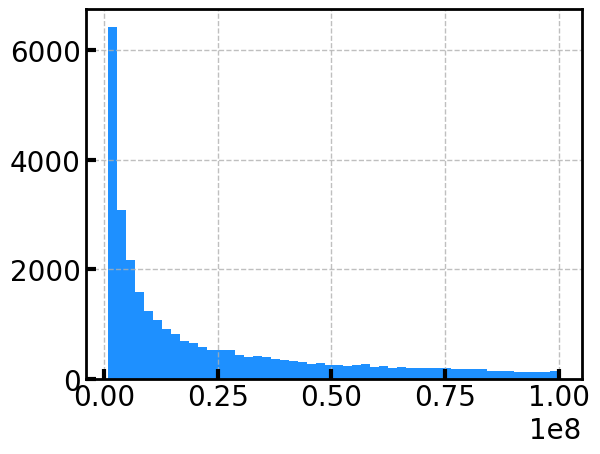

In [ ]:
df_truth_1['energy'].hist(bins=50)
df_truth_1['energy'].describe()

count    2.796700e+04
mean     2.271997e+07
std      2.546016e+07
min      1.000226e+06
25%      3.477298e+06
50%      1.135521e+07
75%      3.430493e+07
max      9.998384e+07
Name: energy, dtype: float64

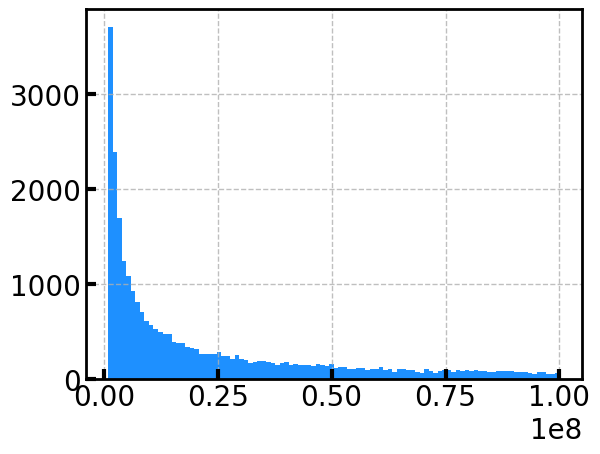

In [ ]:
df_truth_27['energy'].hist(bins=100)
df_truth_27['energy'].describe()

In [ ]:
def printStatsForAllParquetInDir(directory: str):
    for file in os.listdir(directory):
        if file.endswith('.parquet'):
            print(f"Statistics for {file}")
            # Assuming convertParquetToDF is a pre-defined function that reads a parquet file into a DataFrame
            df = convertParquetToDF(os.path.join(directory, file))
            stats = pd.DataFrame({
                "Metric": ["Min", "Max", "Mean", "Median"],
                "Energy": [
                    df['energy'].min(),
                    df['energy'].max(),
                    df['energy'].mean(),
                    df['energy'].median()
                ],
                "N_doms": [
                    df['N_doms'].min(),
                    df['N_doms'].max(),
                    df['N_doms'].mean(),
                    df['N_doms'].median()
                ]
            })
            print(stats)


In [ ]:
printStatsForAllParquetInDir(root_dir)

Statistics for truth_8.parquet
   Metric        Energy       N_doms
0     Min  1.000074e+06     4.000000
1     Max  9.998628e+07  2531.000000
2    Mean  2.273861e+07   358.246864
3  Median  1.133401e+07   201.000000
Statistics for truth_27.parquet
   Metric        Energy       N_doms
0     Min  1.000226e+06     4.000000
1     Max  9.998384e+07  2651.000000
2    Mean  2.271997e+07   355.856939
3  Median  1.135521e+07   203.000000
Statistics for truth_4.parquet
   Metric        Energy      N_doms
0     Min  1.000129e+06     5.00000
1     Max  9.998930e+07  2614.00000
2    Mean  2.282914e+07   357.77988
3  Median  1.132350e+07   203.00000
Statistics for truth_23.parquet
   Metric        Energy       N_doms
0     Min  1.000007e+06     4.000000
1     Max  9.999438e+07  2722.000000
2    Mean  2.270526e+07   354.985484
3  Median  1.116558e+07   199.000000
Statistics for truth_15.parquet
   Metric        Energy       N_doms
0     Min  1.000207e+06     4.000000
1     Max  9.996645e+07  2604.000

In [ ]:
def getFirstAndLastEventNumber(directory: str, file_extension: str):
    first_event_numbers = []
    last_event_numbers = []
    file_names = []
    
    for file in tqdm(os.listdir(directory)):
        if file.endswith(file_extension):
            if file_extension == '.parquet':
                df = convertParquetToDF(os.path.join(directory, file))
                first_event_numbers.append(df['event_no'].min())
                last_event_numbers.append(df['event_no'].max())
            elif file_extension == '.db':
                conn = sql.connect(os.path.join(directory, file))
                df = pd.read_sql_query("SELECT * FROM truth", conn)
                first_event_numbers.append(df['event_no'].min())
                last_event_numbers.append(df['event_no'].max())
            file_names.append(file)
    
    return pd.DataFrame({
        "File Name": file_names,
        "First event_no": first_event_numbers,
        "Last event_no": last_event_numbers
    })

In [ ]:
def checkOverlappingEventsWithRanges(directory: str, file_extension: str):
    file_event_df = getFirstAndLastEventNumber(directory, file_extension)
    file_event_df = file_event_df.sort_values(by="First event_no").reset_index(drop=True)
    
    overlaps = []
    for i in range(1, len(file_event_df)):
        prev_last = file_event_df.loc[i - 1, "Last event_no"]
        curr_first = file_event_df.loc[i, "First event_no"]
        curr_last = file_event_df.loc[i, "Last event_no"]
        
        if curr_first <= prev_last:
            # Overlapping range
            overlap_start = curr_first
            overlap_end = min(prev_last, curr_last)
            overlaps.append({
                "File 1": file_event_df.loc[i - 1, "File Name"],
                "File 2": file_event_df.loc[i, "File Name"],
                "Overlap Range": (overlap_start, overlap_end),
                "Overlap Size": overlap_end - overlap_start + 1
            })
    
    return overlaps

In [ ]:
checkOverlappingEventsWithRanges(root_dir, ".parquet")
# 0.1 sec

100%|██████████| 54/54 [00:00<00:00, 306.17it/s]


[{'File 1': 'truth_6.parquet',
  'File 2': 'truth_7.parquet',
  'Overlap Range': (175338, 175459),
  'Overlap Size': 122},
 {'File 1': 'truth_9.parquet',
  'File 2': 'truth_10.parquet',
  'Overlap Range': (262585, 262799),
  'Overlap Size': 215},
 {'File 1': 'truth_10.parquet',
  'File 2': 'truth_11.parquet',
  'Overlap Range': (292034, 292172),
  'Overlap Size': 139},
 {'File 1': 'truth_17.parquet',
  'File 2': 'truth_18.parquet',
  'Overlap Range': (496058, 496447),
  'Overlap Size': 390},
 {'File 1': 'truth_18.parquet',
  'File 2': 'truth_19.parquet',
  'Overlap Range': (525527, 525683),
  'Overlap Size': 157},
 {'File 1': 'truth_19.parquet',
  'File 2': 'truth_20.parquet',
  'Overlap Range': (554847, 555000),
  'Overlap Size': 154},
 {'File 1': 'truth_20.parquet',
  'File 2': 'truth_21.parquet',
  'Overlap Range': (584664, 584827),
  'Overlap Size': 164},
 {'File 1': 'truth_23.parquet',
  'File 2': 'truth_24.parquet',
  'Overlap Range': (672805, 672961),
  'Overlap Size': 157},
 {'

In [ ]:
# let's see the original pulsemap event_no
dir_22012 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22012"

In [ ]:
# checkOverlappingEventsWithRanges(dir_22012, ".db")
# 20 min